In [3]:
import numpy as np
import matplotlib.pyplot as plt

# setup animation
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')


# to read an image from a url (io) and convert it to grayscale (color)
from skimage import io,color
# convolution
from scipy.signal import convolve2d


import pandas as pd

In [4]:
def aframe(points_1, points_2, plth_1, plth_2):
    def frame_func(phi):
        T = np.array([
            [1 - phi / 3, 0],
            [0, phi]
        ])
        P1 = T @ points_1
        P2 = T @ points_2

        plth_1.set_xdata(P1[0,:])
        plth_1.set_ydata(P1[1,:])

        plth_2.set_xdata(P2[0,:])
        plth_2.set_ydata(P2[1,:])

        return (plth_1, plth_2)
    return frame_func

In [5]:
theta  = np.linspace(0, 2 * np.pi, 100)
points_1 = np.vstack((theta, np.cos(theta)))
points_2 = np.vstack((theta, np.sin(theta)))

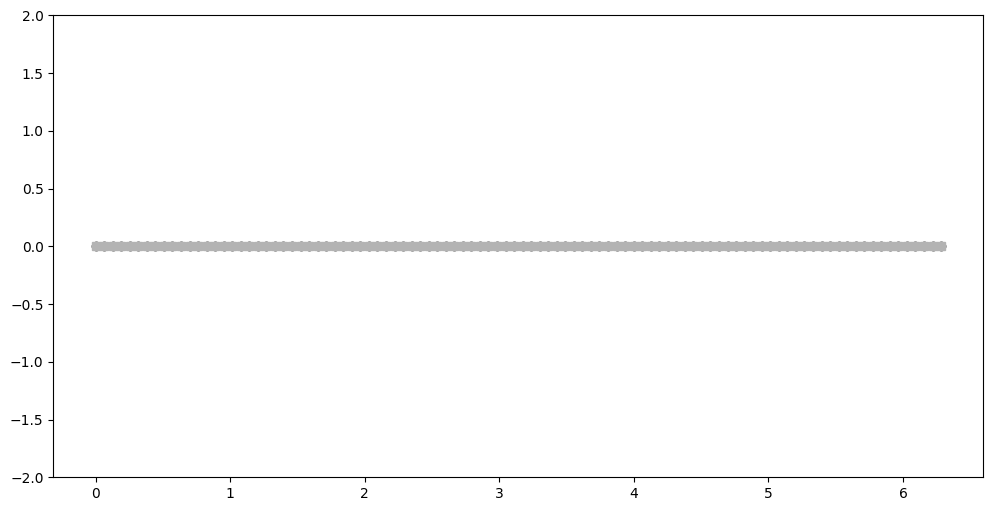

In [7]:
fig,ax = plt.subplots(1,figsize=(12,6))

plth1, = ax.plot(points_1[0,:], points_1[1,:], 'ko')
plth2, = ax.plot(points_2[0,:], points_2[1,:], 's', color=[.7,.7,.7])
ax.set_ylim([-2, 2])


# define phases and run animation
phi = 1 - np.linspace(-1, 1 - 1 / 40, 40) **2
animation.FuncAnimation(fig, aframe(points_1, points_2, plth1, plth2), phi, interval = 50, repeat = True)